In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('spam.csv',encoding='latin1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


1. data로드 분석후 전처리 진행
2. 분석된 내용을 기반으로 문제를 선택하고 학습후 결과를 계산
3. data를 3종으로 나누고 최종 test 데이터의 점수가 높게 나오도록 자유롭게 모델을 튜닝하여 결과를 만드시오

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM, GRU,BatchNormalization,Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [4]:
data=data[['v1','v2']]
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data

C:\Users\student\AppData\Local\Temp/ipykernel_8252/1291640571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['v1'] = data['v1'].replace(['ham','spam'],[0,1])


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [5]:
data.drop_duplicates(subset=['v2'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
X_data = data['v2']
y_data = data['v1']

In [7]:
X_train, tt_x, y_train, tt_y = train_test_split(X_data, y_data, test_size=0.3
                                                , random_state=0, stratify=y_data)

In [8]:
t_x, v_x, t_y, v_y = train_test_split(X_train, y_train, 
                                      test_size=0.2, random_state=0, 
                                      stratify=y_train)

In [9]:
tk = Tokenizer()
tk.fit_on_texts(t_x)
t_x = tk.texts_to_sequences(t_x)

In [10]:
word_to_index = tk.word_index
word_to_index#단어들이 숫자값으로 숫자의 모음=문장

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'your': 11,
 'my': 12,
 'for': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'call': 17,
 'that': 18,
 'on': 19,
 '2': 20,
 'are': 21,
 'but': 22,
 'now': 23,
 'not': 24,
 'so': 25,
 'or': 26,
 'at': 27,
 'can': 28,
 'will': 29,
 'do': 30,
 'be': 31,
 'get': 32,
 "i'm": 33,
 'just': 34,
 'with': 35,
 'if': 36,
 'up': 37,
 'this': 38,
 'we': 39,
 'no': 40,
 'how': 41,
 'gt': 42,
 'lt': 43,
 '4': 44,
 'ur': 45,
 'go': 46,
 'out': 47,
 'free': 48,
 'from': 49,
 'ok': 50,
 'when': 51,
 'like': 52,
 'what': 53,
 'know': 54,
 'got': 55,
 'then': 56,
 'good': 57,
 'am': 58,
 'love': 59,
 'all': 60,
 'was': 61,
 'want': 62,
 'he': 63,
 'time': 64,
 'day': 65,
 'come': 66,
 'only': 67,
 'there': 68,
 'text': 69,
 'its': 70,
 'going': 71,
 'lor': 72,
 'need': 73,
 'as': 74,
 'home': 75,
 'see': 76,
 'send': 77,
 'one': 78,
 'any': 79,
 'da': 80,
 'still': 81,
 'about': 82,
 'k': 83,
 'txt': 84,
 'dont

In [11]:
n=len(word_to_index) + 1

In [12]:
s_t_x = pad_sequences(t_x)#패딩화
s_t_x.shape#문장의 크긴 동일

(2894, 189)

In [13]:
tt_x = tk.texts_to_sequences(tt_x)
tt_x = pad_sequences(tt_x)
v_x = tk.texts_to_sequences(v_x)
v_x = pad_sequences(v_x)

In [14]:
es = EarlyStopping(monitor='val_loss',
                   mode='min', verbose=1, patience=4)

SimpleRNN

In [15]:
mc1 = ModelCheckpoint('best_m1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
m1 = Sequential()
m1.add(Embedding(n, 64))
m1.add(SimpleRNN(64,dropout=0.5,return_sequences=True)) 
m1.add(SimpleRNN(32,dropout=0.5)) #데이터간 가중치를 기억함
m1.add(Dense(1, activation='sigmoid'))
m1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history1 = m1.fit(s_t_x, t_y,epochs=15, callbacks=[es, mc1],batch_size=64,  validation_data=(v_x,v_y) )

Epoch 1/15
46/46 [==============================] - 4s 58ms/step - loss: 0.4216 - acc: 0.8511 - val_loss: 0.3593 - val_acc: 0.8743

Epoch 00001: val_acc improved from -inf to 0.87431, saving model to best_m1.h5
Epoch 2/15
46/46 [==============================] - 2s 53ms/step - loss: 0.2063 - acc: 0.9288 - val_loss: 0.1528 - val_acc: 0.9461

Epoch 00002: val_acc improved from 0.87431 to 0.94613, saving model to best_m1.h5
Epoch 3/15
46/46 [==============================] - 2s 51ms/step - loss: 0.0617 - acc: 0.9855 - val_loss: 0.0925 - val_acc: 0.9696

Epoch 00003: val_acc improved from 0.94613 to 0.96961, saving model to best_m1.h5
Epoch 4/15
46/46 [==============================] - 2s 49ms/step - loss: 0.0347 - acc: 0.9921 - val_loss: 0.0879 - val_acc: 0.9724

Epoch 00004: val_acc improved from 0.96961 to 0.97238, saving model to best_m1.h5
Epoch 5/15
46/46 [==============================] - 2s 49ms/step - loss: 0.0176 - acc: 0.9955 - val_loss: 0.1634 - val_acc: 0.9572

Epoch 00005: va

In [16]:
ck1=m1.evaluate(tt_x, tt_y)

49/49 [==============================] - 0s 4ms/step - loss: 0.0828 - acc: 0.9800


LSTM

In [17]:
mc2 = ModelCheckpoint('best_m2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
m2 = Sequential()
m2.add(Embedding(n, 64))
m2.add(LSTM(64,dropout=0.5,return_sequences=True)) 
m2.add(LSTM(32,dropout=0.5)) 
m2.add(Dense(1, activation='sigmoid'))
m2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history2 = m2.fit(s_t_x, t_y,epochs=15, callbacks=[es, mc2],batch_size=64,  validation_data=(v_x,v_y) )

Epoch 1/15
46/46 [==============================] - 8s 120ms/step - loss: 0.3914 - acc: 0.8632 - val_loss: 0.1934 - val_acc: 0.9503

Epoch 00001: val_acc improved from -inf to 0.95028, saving model to best_m2.h5
Epoch 2/15
46/46 [==============================] - 5s 108ms/step - loss: 0.1047 - acc: 0.9768 - val_loss: 0.1033 - val_acc: 0.9669

Epoch 00002: val_acc improved from 0.95028 to 0.96685, saving model to best_m2.h5
Epoch 3/15
46/46 [==============================] - 5s 111ms/step - loss: 0.0388 - acc: 0.9907 - val_loss: 0.0865 - val_acc: 0.9724

Epoch 00003: val_acc improved from 0.96685 to 0.97238, saving model to best_m2.h5
Epoch 4/15
46/46 [==============================] - 5s 113ms/step - loss: 0.0204 - acc: 0.9959 - val_loss: 0.0789 - val_acc: 0.9765

Epoch 00004: val_acc improved from 0.97238 to 0.97652, saving model to best_m2.h5
Epoch 5/15
46/46 [==============================] - 5s 113ms/step - loss: 0.0131 - acc: 0.9972 - val_loss: 0.0816 - val_acc: 0.9820

Epoch 0000

In [18]:
ck2=m2.evaluate(tt_x, tt_y)

49/49 [==============================] - 1s 11ms/step - loss: 0.0927 - acc: 0.9819


GRU

In [19]:
mc3 = ModelCheckpoint('best_m3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
m3 = Sequential()
m3.add(Embedding(n, 64))
m3.add(GRU(64,dropout=0.5,return_sequences=True)) 
m3.add(GRU(32,dropout=0.5)) 
m3.add(Dense(1, activation='sigmoid'))
m3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history3 = m3.fit(s_t_x, t_y,epochs=15, callbacks=[es, mc3],batch_size=64,  validation_data=(v_x,v_y) )

Epoch 1/15
46/46 [==============================] - 7s 113ms/step - loss: 0.3759 - acc: 0.8656 - val_loss: 0.1909 - val_acc: 0.9185

Epoch 00001: val_acc improved from -inf to 0.91851, saving model to best_m3.h5
Epoch 2/15
46/46 [==============================] - 5s 103ms/step - loss: 0.0725 - acc: 0.9800 - val_loss: 0.0699 - val_acc: 0.9834

Epoch 00002: val_acc improved from 0.91851 to 0.98343, saving model to best_m3.h5
Epoch 3/15
46/46 [==============================] - 5s 104ms/step - loss: 0.0238 - acc: 0.9938 - val_loss: 0.0709 - val_acc: 0.9834

Epoch 00003: val_acc did not improve from 0.98343
Epoch 4/15
46/46 [==============================] - 5s 105ms/step - loss: 0.0119 - acc: 0.9976 - val_loss: 0.0666 - val_acc: 0.9848

Epoch 00004: val_acc improved from 0.98343 to 0.98481, saving model to best_m3.h5
Epoch 5/15
46/46 [==============================] - 5s 100ms/step - loss: 0.0059 - acc: 0.9990 - val_loss: 0.0915 - val_acc: 0.9793

Epoch 00005: val_acc did not improve from 

In [20]:
ck3=m3.evaluate(tt_x, tt_y)

49/49 [==============================] - 1s 8ms/step - loss: 0.0697 - acc: 0.9858


Bidirectional(LSTM)

In [21]:
mc4 = ModelCheckpoint('best_m4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
m4 = Sequential()
m4.add(Embedding(n, 64))
m4.add(Bidirectional(LSTM(64,dropout=0.5,return_sequences=True)))
m4.add(Bidirectional(LSTM(32,dropout=0.5))) 
m4.add(Dense(1, activation='sigmoid'))
m4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history4 = m4.fit(s_t_x, t_y,epochs=15, callbacks=[es, mc4],batch_size=64,  validation_data=(v_x,v_y) )

Epoch 1/15
46/46 [==============================] - 13s 201ms/step - loss: 0.3566 - acc: 0.8645 - val_loss: 0.2183 - val_acc: 0.9171

Epoch 00001: val_acc improved from -inf to 0.91713, saving model to best_m4.h5
Epoch 2/15
46/46 [==============================] - 8s 181ms/step - loss: 0.0846 - acc: 0.9813 - val_loss: 0.0779 - val_acc: 0.9793

Epoch 00002: val_acc improved from 0.91713 to 0.97928, saving model to best_m4.h5
Epoch 3/15
46/46 [==============================] - 8s 183ms/step - loss: 0.0319 - acc: 0.9927 - val_loss: 0.0681 - val_acc: 0.9820

Epoch 00003: val_acc improved from 0.97928 to 0.98204, saving model to best_m4.h5
Epoch 4/15
46/46 [==============================] - 9s 190ms/step - loss: 0.0174 - acc: 0.9972 - val_loss: 0.0637 - val_acc: 0.9862

Epoch 00004: val_acc improved from 0.98204 to 0.98619, saving model to best_m4.h5
Epoch 5/15
46/46 [==============================] - 9s 198ms/step - loss: 0.0120 - acc: 0.9976 - val_loss: 0.0726 - val_acc: 0.9848

Epoch 000

In [22]:
ck4=m4.evaluate(tt_x, tt_y)

49/49 [==============================] - 1s 13ms/step - loss: 0.0985 - acc: 0.9813


In [23]:
print(ck1,ck2,ck3,ck4,sep='\n')

[0.08279519528150558, 0.9800128936767578]
[0.09270445257425308, 0.981947124004364]
[0.06970376521348953, 0.9858155846595764]
[0.09853313118219376, 0.9813023805618286]


In [24]:
ck_v_1=m1.evaluate(v_x, v_y)
ck_v_2=m2.evaluate(v_x, v_y)
ck_v_3=m3.evaluate(v_x, v_y)
ck_v_4=m4.evaluate(v_x, v_y)
print(ck_v_1,ck_v_2,ck_v_3,ck_v_4,sep='\n')

23/23 [==============================] - 0s 16ms/step - loss: 0.0936 - acc: 0.9820
[0.09893514215946198, 0.9751381278038025]
[0.08119715750217438, 0.9834254384040833]
[0.07205472886562347, 0.9861878156661987]
[0.09355402737855911, 0.9820442199707031]


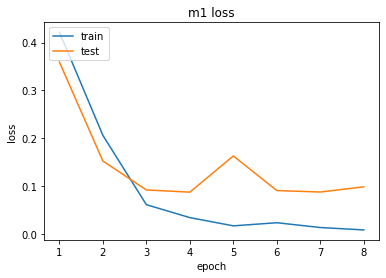

In [25]:
epochs = range(1, len(history1.history['acc']) + 1)
plt.plot(epochs, history1.history['loss'])
plt.plot(epochs, history1.history['val_loss'])
plt.title('m1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

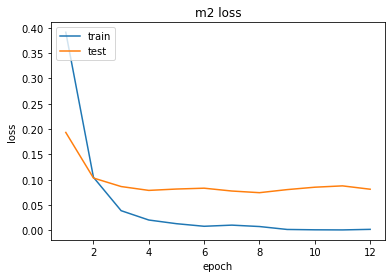

In [26]:
epochs = range(1, len(history2.history['acc']) + 1)
plt.plot(epochs, history2.history['loss'])
plt.plot(epochs, history2.history['val_loss'])
plt.title('m2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

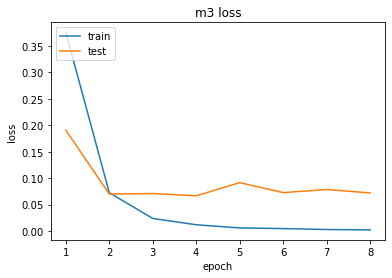

In [27]:
epochs = range(1, len(history3.history['acc']) + 1)
plt.plot(epochs, history3.history['loss'])
plt.plot(epochs, history3.history['val_loss'])
plt.title('m3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

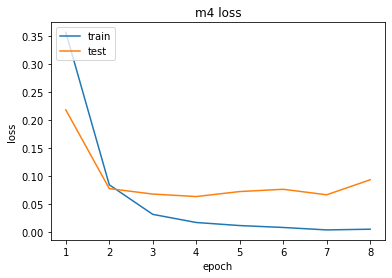

In [28]:
epochs = range(1, len(history4.history['acc']) + 1)
plt.plot(epochs, history4.history['loss'])
plt.plot(epochs, history4.history['val_loss'])
plt.title('m4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()